In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

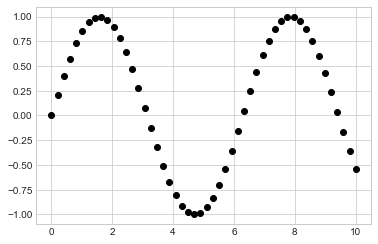

In [10]:
x = np.linspace(0, 10, 50)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

- The third argument in the function call is a character that represents the type of symbol used for the plotting. 

- Just as you can specify options such as '-', '--' to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of plt.plot, or in Matplotlib's online documentation.



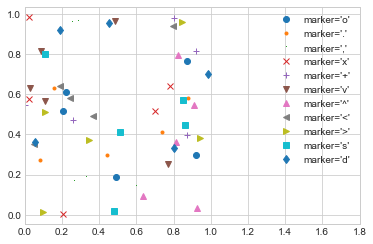

In [17]:
rng=np.random.RandomState(5)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5),rng.rand(5),marker,label="marker='{}'".format(marker[0]))
plt.legend()
plt.legend(numpoints=1)
plt.xlim(0,1.8);

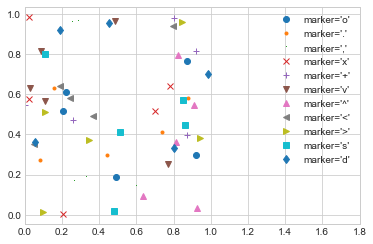

In [18]:
rng=np.random.RandomState(5)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(5),rng.random(5),marker,label="marker='{}'".format(marker[0]))
plt.legend()
plt.legend(numpoints=1)
plt.xlim(0,1.8);

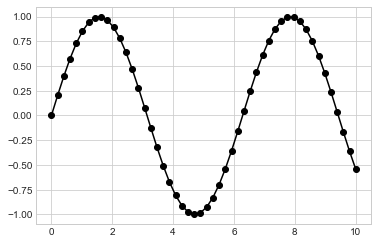

In [19]:
plt.plot(x, y, '-ok');

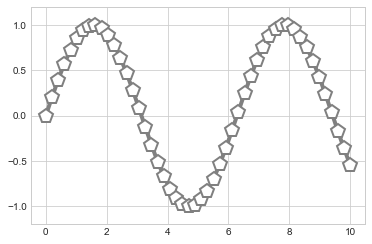

In [20]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

# Scatter Plots with plt.scatter

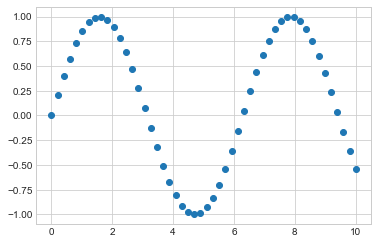

In [21]:
plt.scatter(x, y, marker='o');

- The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

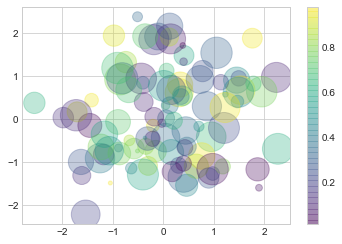

In [22]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

- Notice that the color argument is automatically mapped to a color scale (shown here by the colorbar() command), and that the size argument is given in pixels. In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

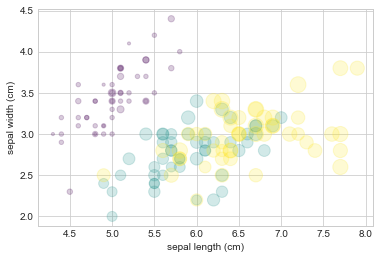

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [27]:
features = iris.data.T
features

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

- We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

## plot Versus scatter: A Note on Efficiency:

- Aside from the different features available in plt.plot and plt.scatter, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, plt.plot can be noticeably more efficient than plt.scatter. The reason is that plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.

- In plt.plot, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, plt.plot should be preferred over plt.scatter for large datasets.

# Histograms, Binnings, and Density

In [30]:
data = np.random.randn(1000)
data

array([-1.48084304e+00, -8.54524591e-01,  3.08225113e-01,  9.11111932e-01,
        8.21972594e-01,  1.06923861e-01, -9.43378398e-01, -4.37226155e-01,
       -1.26251522e+00, -1.36914115e+00,  5.86018811e-01, -1.36115116e+00,
        8.16000690e-01,  9.75937503e-01,  9.85326996e-01, -5.18241658e-02,
        3.15960612e-01, -1.53597798e-01, -6.92936657e-01,  2.25907033e-01,
       -9.65584108e-01, -2.02260366e+00,  4.57500350e-01,  5.40492130e-01,
       -2.84670140e-01, -4.72926710e-01, -4.56177377e-01, -1.99875768e-01,
        3.10038394e-01, -9.50465639e-01,  5.18553463e-01,  7.96034596e-01,
        9.07431007e-01, -9.67004915e-01,  1.48335673e-01, -8.59202972e-01,
        7.49681632e-01,  1.71938897e-01, -1.12516082e+00,  1.16050371e+00,
        9.96881975e-01, -1.06156945e+00, -8.57487344e-01,  1.94084540e+00,
        2.95427316e-03,  4.82111148e-01,  5.39024742e-01,  3.05737017e+00,
        1.06760621e+00, -3.33681385e-01,  1.15056921e+00, -2.39350719e+00,
       -2.01761121e+00,  

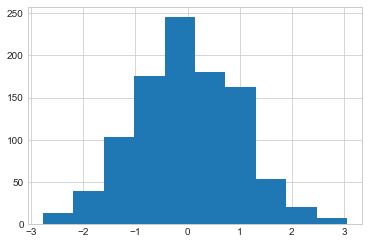

In [31]:
plt.hist(data);

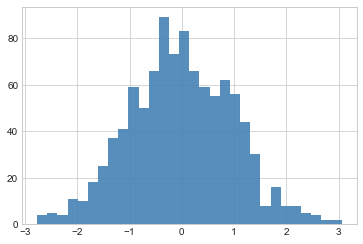

In [35]:
plt.hist(data, bins=30, alpha=0.9,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

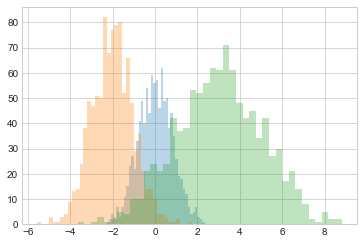

In [37]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);